## lab4_fsic-fpga Group 4 Report 

### 1. Refer to lab-fsim-sim, Integrate FIR into PRJ1 (axilite, axi-stream in/out)

As in the `lab-fsim-sim`, we first imported the reference FIR project into the `user_prj1` folder `(/fsic_fpga/vivado/vvd_srcs/caravel_soc/rtl/user/user_subsys/user_prj/user_prj1/rtl/)` and correctly connected the user project wrapper and the FIR module.

We also updated all file lists and includes in the TCL file necessary for simulation and synthesis. Update list:

```
/fsic_fpga/vivado/vvd_srcs/caravel_soc/rtl/user/user_subsys/user_prj/user_prj1/rtl/rtl.f
/fsic_fpga/vivado/vvd_caravel_fpga_fsic_sim.tcl
/fsic_fpga/vivado/vvd_caravel_fpga_fsic.tcl
```

### 2. Refer to hls_userdma, design a dma for FIR

We referred to the user DMA template and, due to an infinite while loop issue, we set `BUF_LEN`=64. 
Then, we modified script.tcl to export the RTL of the new version of DMA.

### 3. Vivado simulation

We disabled all tests in the original testbench `fsic.tb.v`, such as `Fpga2Soc_CfgRead()`, `Fpga2Soc_CfgWrite()`, `FpgaLocal_CfgRead()`, `SocLocal_MbWrite()`, `FpgaLocal_MbWrite()`, `SocLa2DmaPath(),` and `SocUp2DmaPath()`. 
We then designed suitable tasks `SocUp2DmaPath_FIR()` and `CheckuserDMADone_FIR()` for testing our DMA and FIR IP, based on the tasks `SocUp2DmaPath()` and `CheckuserDMADone()` in original testbench.

`SocUp2DmaPath_FIR()` performed the following tasks:

|Target Behavior|Simulation Result|
|---|---|
|DMA load input||
|s2m exit clear|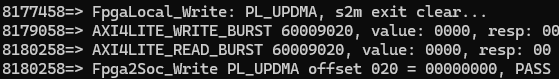|
|s2m disable to clear|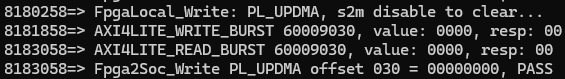|
|m2s exit clear|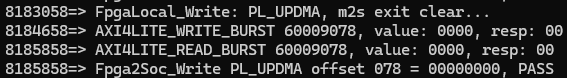|
|m2s disable to clear|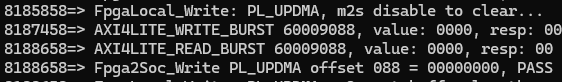|
|s2m set buffer length|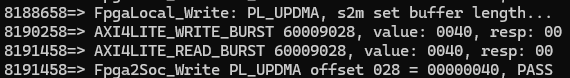|
|s2m set buffer low|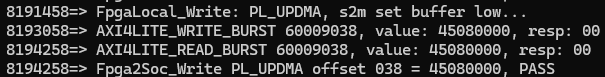|
|s2m set buffer high|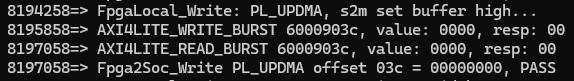|
|set image width|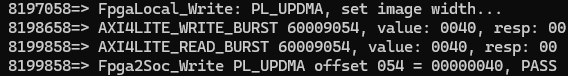|
|m2s set buffer low|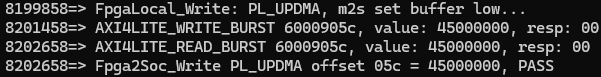|
|m2s set buffer high|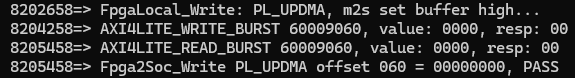|
|m2s set buffer length|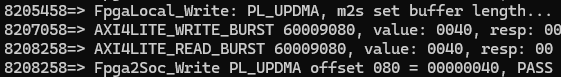|
|select FIR IP user project|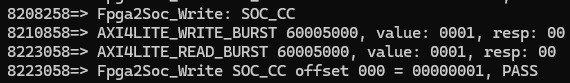|
|configure data length in FIR IP|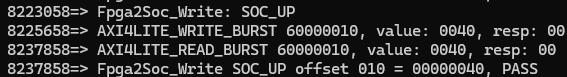|
|configure taps in FIR IP|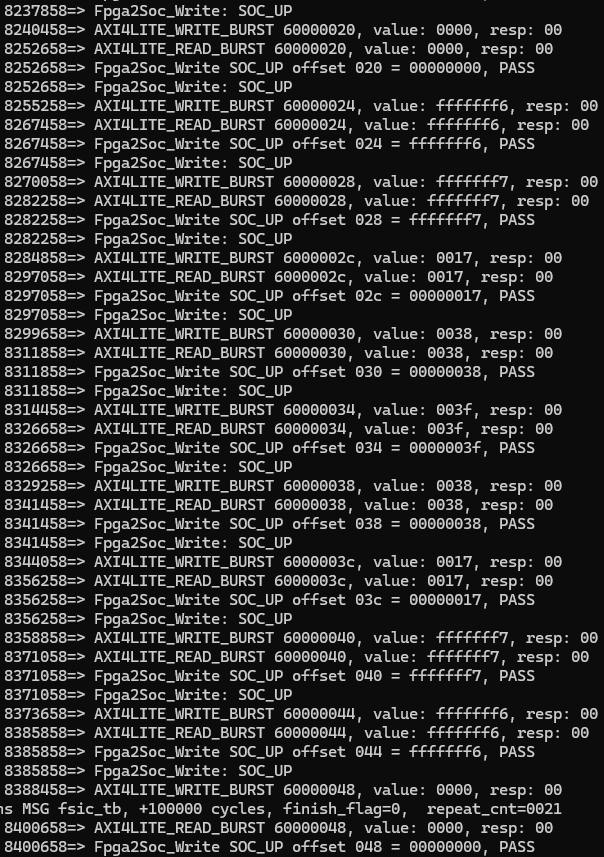|
|recheck user project sel|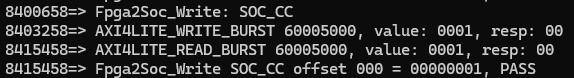|
|configure ap_start in FIR IP|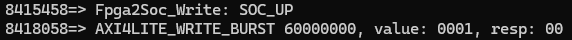|
|set ap_start|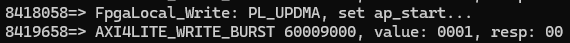|

`CheckuserDMADone_FIR()` performed the following tasks:

|Target Behavior|Simulation Result|
|---|---|
|polling ap_done|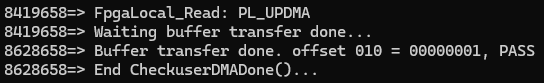|


### 4. Build FPGA

Since `hls_userdma` was re-exported, we updated `vvd_caravel_fpga_fsic.tcl` to reconnect `hls_userdma` and `ps_axil`. 
We then ran the TCL script to generate `caravel_fpga.bit` and `caravel_fpga.hwh` for later PYNQ validation.

### 5. Firmware code

We used the original firmware code.

### 6. Jupyter-notebook Python code

We referred to the original Jupyter Python code and skipped the LADMA verification part. However, we used the LADMA verification part as a reference to write our own UPDMA verification part, which follows the same flow as in the Vivado testbench.

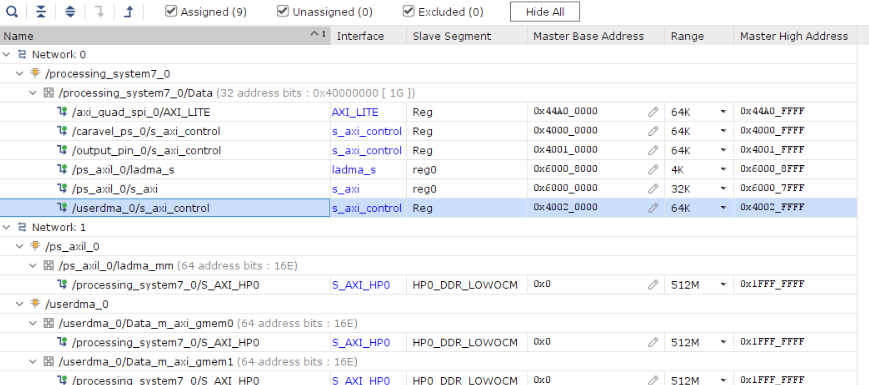
Using the memory map generated by Vivado, we set MMIO for UPDMA in Python: `mmio_UPDMA = MMIO(0x40020000, 0x00010000)`. We rewrote the testbench in Python to access the configuration registers with `mmio.read()`, `mmio.write()`, `mmio_UPDMA.read()`, and `mmio_UPDMA.write()`.


### Issue and Solution

There were 600 test vectors for the FIR in the original file, so we initially set `BUF_LEN`=600 in `hls_userdma` to test the FIR with the whole set of vectors. 
However, during the simulation stage, hls_userdma reported a deadlock. 

We passed the testbench by setting `BUF_LEN` to 64.

